<a href="https://colab.research.google.com/github/vigneshkumars-23/MachineLearning/blob/master/COVID19%26Weather_Eval2_CSE18164.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Evaluation 2
Name: Vignesh Kumar S<br>
Roll No: CB.EN.U4CSE18164<BR>
### Importing the Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

### Load the Dataset<br>
Dataset link (Week 4): https://www.kaggle.com/davidbnn92/weather-data-for-covid19-data-analysis?select=training_data_with_weather_info_week_4.csv 

In [2]:
df = pd.read_csv("training_data_with_weather_info_week_4.csv")
df.head(10)

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,Afghanistan,NaN,2020-01-22,0.0,0.0,Afghanistan-,33.0,65.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,Afghanistan,NaN,2020-01-23,0.0,0.0,Afghanistan-,33.0,65.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,Afghanistan,NaN,2020-01-24,0.0,0.0,Afghanistan-,33.0,65.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,Afghanistan,NaN,2020-01-25,0.0,0.0,Afghanistan-,33.0,65.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,Afghanistan,NaN,2020-01-26,0.0,0.0,Afghanistan-,33.0,65.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1
5,6,Afghanistan,NaN,2020-01-27,0.0,0.0,Afghanistan-,33.0,65.0,27,43.0,36.5,50.7,999.9,1015.7,35.6,0.748685,0.250325,3.7,0.04,0
6,7,Afghanistan,NaN,2020-01-28,0.0,0.0,Afghanistan-,33.0,65.0,28,41.7,34.7,48.2,999.9,1016.9,34.7,0.759514,0.273882,2.4,0.00,0
7,8,Afghanistan,NaN,2020-01-29,0.0,0.0,Afghanistan-,33.0,65.0,29,15.2,13.3,16.9,774.1,1024.7,0.2,0.509437,-0.035773,2.4,0.00,0
8,9,Afghanistan,NaN,2020-01-30,0.0,0.0,Afghanistan-,33.0,65.0,30,15.2,13.3,16.9,774.1,1024.7,0.2,0.509437,-0.035773,2.4,0.00,0
9,10,Afghanistan,NaN,2020-01-31,0.0,0.0,Afghanistan-,33.0,65.0,31,5.6,4.8,7.7,774.4,1031.0,-0.6,0.751688,-0.021931,1.9,0.00,1


Shape of the Dataset

In [3]:
df.shape

(24414, 21)

### Checking for Null Values (column-wise)

In [4]:
df.isnull().sum()

Id                        0
Country_Region            0
Province_State        14040
Date                      0
ConfirmedCases            0
Fatalities                0
country+province          0
Lat                       0
Long                      0
day_from_jan_first        0
temp                      0
min                     115
max                      26
stp                       0
slp                   10105
dewp                    628
rh                      628
ah                      628
wdsp                      0
prcp                      0
fog                       0
dtype: int64

### Preprocessing

In [5]:
df['min'][df['min'].isnull()] = np.nanmean(df['min'])
df['max'][df['max'].isnull()] = np.nanmean(df['max'])
df['dewp'][df['dewp'].isnull()] = np.nanmean(df['dewp'])
df['rh'][df['rh'].isnull()] = np.nanmean(df['rh'])
df['ah'][df['ah'].isnull()] = np.nanmean(df['ah'])
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

Id                        0
Country_Region            0
Province_State        14040
Date                      0
ConfirmedCases            0
Fatalities                0
country+province          0
Lat                       0
Long                      0
day_from_jan_first        0
temp                      0
min                       0
max                       0
stp                       0
slp                   10105
dewp                      0
rh                        0
ah                        0
wdsp                      0
prcp                      0
fog                       0
dtype: int64

In [6]:
df.dtypes

Id                      int64
Country_Region         object
Province_State         object
Date                   object
ConfirmedCases        float64
Fatalities            float64
country+province       object
Lat                   float64
Long                  float64
day_from_jan_first      int64
temp                  float64
min                   float64
max                   float64
stp                   float64
slp                   float64
dewp                  float64
rh                    float64
ah                    float64
wdsp                  float64
prcp                  float64
fog                     int64
dtype: object

In [7]:
df.dtypes
df['Date']= pd.to_datetime(df['Date'])

Seperating the Date into Days, Month, Year and DayoftheWeek

In [8]:
df['Dayofweek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df.drop(columns=['Date'], inplace=True)
df.head(10)

,Id,Country_Region,Province_State,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog,Dayofweek,Month,Day,Year
0,1,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0,2,1,22,2020
1,2,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1,3,1,23,2020
2,3,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1,4,1,24,2020
3,4,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1,5,1,25,2020
4,5,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1,6,1,26,2020
5,6,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,27,43.0,36.5,50.7,999.9,1015.7,35.6,0.748685,0.250325,3.7,0.04,0,0,1,27,2020
6,7,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,28,41.7,34.7,48.2,999.9,1016.9,34.7,0.759514,0.273882,2.4,0.00,0,1,1,28,2020
7,8,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,29,15.2,13.3,16.9,774.1,1024.7,0.2,0.509437,-0.035773,2.4,0.00,0,2,1,29,2020
8,9,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,30,15.2,13.3,16.9,774.1,1024.7,0.2,0.509437,-0.035773,2.4,0.00,0,3,1,30,2020
9,10,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,31,5.6,4.8,7.7,774.4,1031.0,-0.6,0.751688,-0.021931,1.9,0.00,1,4,1,31,2020


In [9]:
# df = df.loc[df['Country_Region']=='Australia',:]
df.head()

,Id,Country_Region,Province_State,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog,Dayofweek,Month,Day,Year
0,1,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0,2,1,22,2020
1,2,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1,3,1,23,2020
2,3,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1,4,1,24,2020
3,4,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1,5,1,25,2020
4,5,Afghanistan,NaN,0.0,0.0,Afghanistan-,33.0,65.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1,6,1,26,2020


In [10]:
df.isnull().sum()

Id                        0
Country_Region            0
Province_State        14040
ConfirmedCases            0
Fatalities                0
country+province          0
Lat                       0
Long                      0
day_from_jan_first        0
temp                      0
min                       0
max                       0
stp                       0
slp                   10105
dewp                      0
rh                        0
ah                        0
wdsp                      0
prcp                      0
fog                       0
Dayofweek                 0
Month                     0
Day                       0
Year                      0
dtype: int64

### Scaling

In [11]:
df.drop(columns=['Country_Region','country+province','Province_State','rh','ah','Year','Lat','Long','slp','Id'], inplace=True)
scalar = MinMaxScaler()
tt_df = df.iloc[:,:-1]
scale_df = pd.DataFrame(scalar.fit_transform(tt_df), columns=tt_df.columns)
scale_df.head()

,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,dewp,wdsp,prcp,fog,Dayofweek,Month
0,0.0,0.0,0.000000,0.569507,0.585185,0.562969,1.0,0.556837,0.009401,0.000000,0.0,0.333333,0.0
1,0.0,0.0,0.012987,0.565022,0.578519,0.570465,1.0,0.518946,0.014901,1.000000,1.0,0.500000,0.0
2,0.0,0.0,0.025974,0.550822,0.609630,0.475262,1.0,0.615321,0.010401,0.001700,1.0,0.666667,0.0
3,0.0,0.0,0.038961,0.594918,0.617037,0.573463,1.0,0.642504,0.006101,0.005701,1.0,0.833333,0.0
4,0.0,0.0,0.051948,0.571001,0.603704,0.549475,1.0,0.604613,0.010801,0.000000,1.0,1.000000,0.0


### Pearson's Analysis
Here I am using Seaborn to map the Correlation Matrix

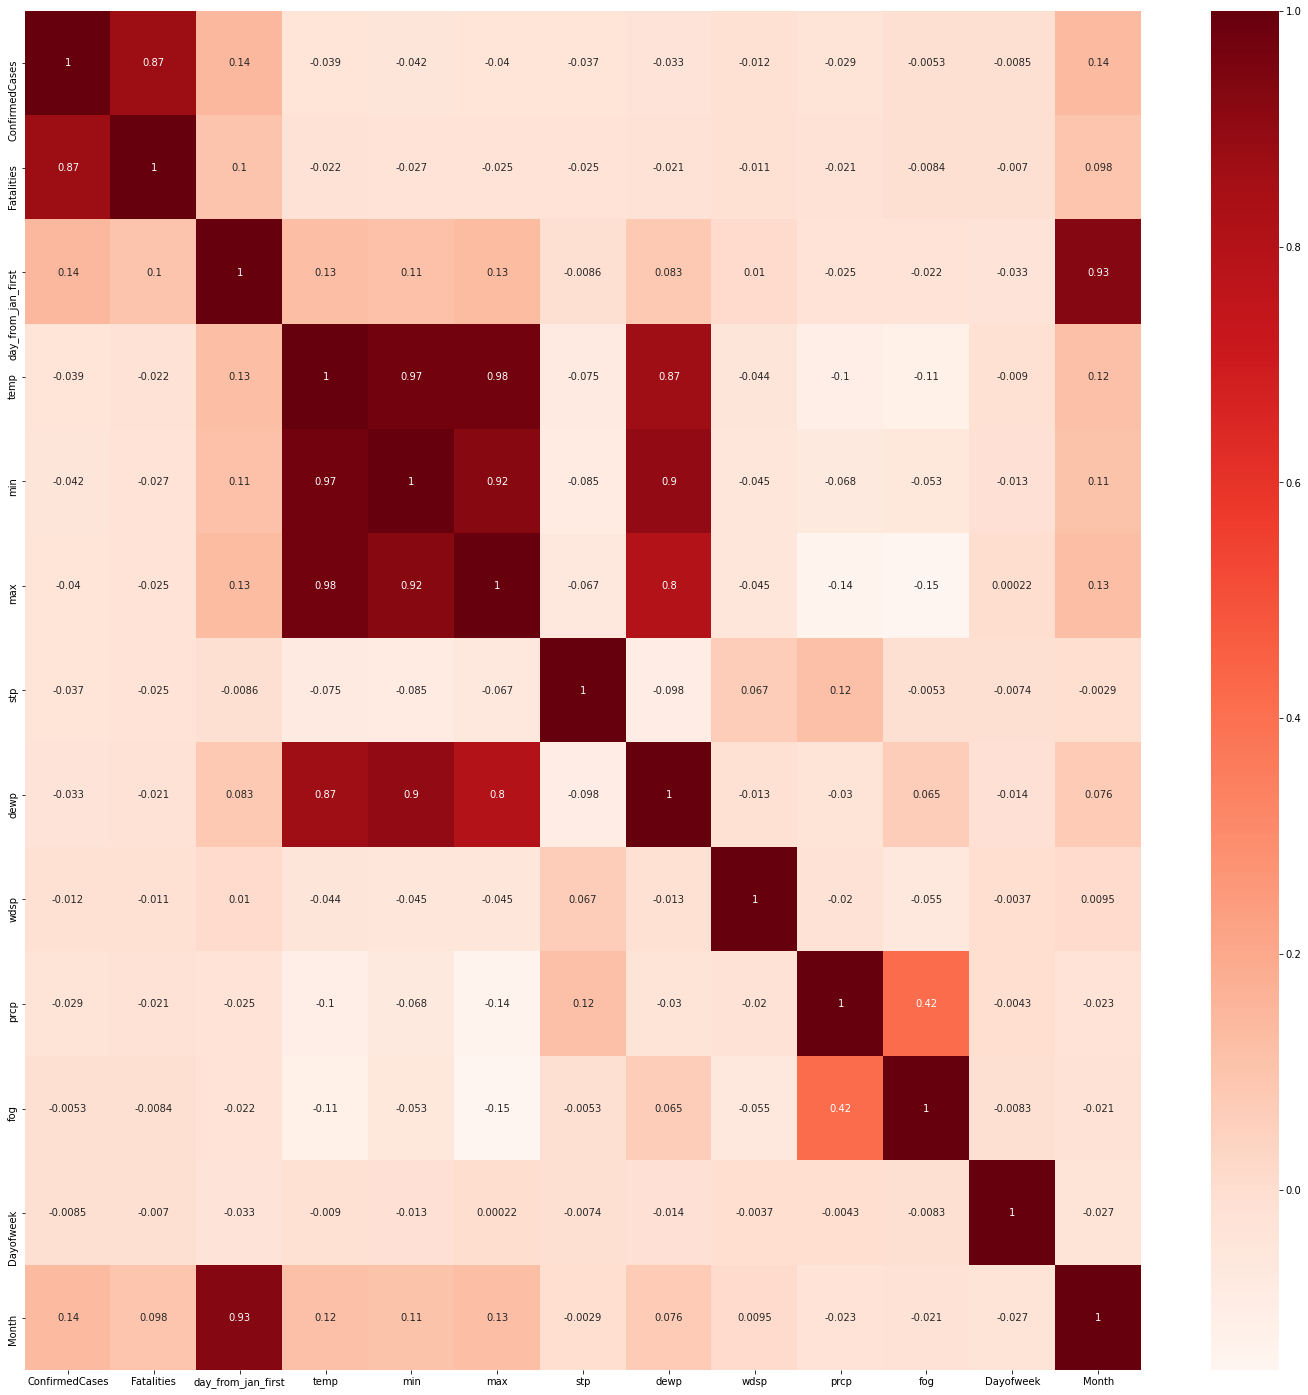

In [12]:
cor = scale_df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(cor, annot=True, cmap = plt.cm.Reds)

### Inferences
1. It is clear that there is no significant correlation with Weather and the World Corona Virus Spread.<br>
2. There can be two reasons for this, one is because the data is insufficient and the other reason is that the data is not complete as we have seen before the province_state values were not completely filled.
3. Let us try to build the Regression model for this. 

In [13]:
y_scaled = scale_df.loc[:,['ConfirmedCases','Fatalities']]
scale_df.drop(columns=['ConfirmedCases','Fatalities'],inplace=True)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(scale_df,y_scaled,test_size=0.2)

In [15]:
x_train.head()

,day_from_jan_first,temp,min,max,stp,dewp,wdsp,prcp,fog,Dayofweek,Month
23076,0.857143,0.754858,0.796296,0.689655,1.000000,0.812191,0.013601,0.0000,0.0,0.833333,0.666667
7256,0.025974,0.763827,0.760000,0.769115,1.000000,0.808072,0.004900,0.0000,0.0,0.666667,0.000000
24054,0.389610,0.796712,0.840000,0.755622,1.000000,0.886326,0.003600,0.0002,1.0,0.666667,0.333333
2401,0.792208,0.837070,0.882963,0.808096,0.962796,0.931631,0.001500,0.0000,0.0,0.000000,0.666667
7626,0.779221,0.350523,0.380000,0.387556,0.011701,0.355848,0.015602,0.0000,1.0,1.000000,0.666667


In [16]:
reg=LinearRegression()
reg = reg.fit(x_train,y_train)
y1 = reg.predict(x_test)
print('Mean Squared Error: '+str(mean_squared_error(y_test,y1)))
print('R2 Score: '+str(r2_score(y_test, y1)))

Mean Squared Error: 0.001861407349509936
R2 Score: 0.021675421634404446


### Result
We can clearly see that the R2 score is very less and hence this model cannot be used.<br>
Now I am narrowing down my observations to China.

In [30]:
df.head()

,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,dewp,wdsp,prcp,fog,Dayofweek,Month,Day
0,0.0,0.0,22,42.6,33.6,54.9,999.9,27.4,9.4,0.00,0,2,1,22
1,0.0,0.0,23,42.0,32.7,55.9,999.9,22.8,14.9,99.99,1,3,1,23
2,0.0,0.0,24,40.1,36.9,43.2,999.9,34.5,10.4,0.17,1,4,1,24
3,0.0,0.0,25,46.0,37.9,56.3,999.9,37.8,6.1,0.57,1,5,1,25
4,0.0,0.0,26,42.8,36.1,53.1,999.9,33.2,10.8,0.00,1,6,1,26


### Equality of Means/Medain Hypothesis Test
This test is basically used to observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. <br>
<b>If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages</b>


In [31]:
sample = df['temp'].sample(n=250)
test = df['temp']

from scipy.stats import ttest_ind

stat, p = ttest_ind(sample, test)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=-1.317, p=0.188


In our case we are having nearly 18%, so this clearly says that the temperature is significantly different in different countries and hence our model is failing to understand this crux.
Weather condition is ofcourse different in different countries, so to actually check the dependence of weather on COVID-19 spread, we have to choose a particular country and explore on it.

## Trying for a Specific Country

In [17]:
df2 = pd.read_csv("/content/training_data_with_weather_info_week_4.csv")
df2 = df2.loc[df2['Country_Region']=='China',:]
df2.head()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
4212,6157,China,Anhui,2020-01-22,1.0,0.0,China-Anhui,31.8257,117.2264,22,42.3,32.5,43.5,15.9,1022.3,42.1,0.992303,0.344891,4.4,0.11,1
4213,6158,China,Anhui,2020-01-23,9.0,0.0,China-Anhui,31.8257,117.2264,23,45.0,38.5,48.2,19.0,1025.4,43.0,0.926185,0.282914,6.7,0.04,1
4214,6159,China,Anhui,2020-01-24,15.0,0.0,China-Anhui,31.8257,117.2264,24,42.4,38.3,48.0,23.5,1029.9,41.0,0.947242,0.327325,8.4,0.04,1
4215,6160,China,Anhui,2020-01-25,39.0,0.0,China-Anhui,31.8257,117.2264,25,39.9,36.9,44.6,22.2,1028.6,37.0,0.892407,0.368431,7.7,0.11,1
4216,6161,China,Anhui,2020-01-26,60.0,0.0,China-Anhui,31.8257,117.2264,26,32.6,32.0,43.2,19.0,1025.5,32.6,1.000000,4.070444,5.3,0.83,1


In [18]:
df2['min'][df2['min'].isnull()] = np.nanmean(df2['min'])
df2['max'][df2['max'].isnull()] = np.nanmean(df2['max'])
df2['dewp'][df2['dewp'].isnull()] = np.nanmean(df2['dewp'])
df2['rh'][df2['rh'].isnull()] = np.nanmean(df2['rh'])
df2['ah'][df2['ah'].isnull()] = np.nanmean(df2['ah'])
df2.isnull().sum()

Id                      0
Country_Region          0
Province_State          0
Date                    0
ConfirmedCases          0
Fatalities              0
country+province        0
Lat                     0
Long                    0
day_from_jan_first      0
temp                    0
min                     0
max                     0
stp                     0
slp                   624
dewp                    0
rh                      0
ah                      0
wdsp                    0
prcp                    0
fog                     0
dtype: int64

In [19]:
df2['Date']= pd.to_datetime(df2['Date'])
df2['Dayofweek'] = df2['Date'].dt.dayofweek
df2['Month'] = df2['Date'].dt.month
df2['Day'] = df2['Date'].dt.day
df2['Year'] = df2['Date'].dt.year
df2.drop(columns=['Date'], inplace=True)
df2.head(10)

,Id,Country_Region,Province_State,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog,Dayofweek,Month,Day,Year
4212,6157,China,Anhui,1.0,0.0,China-Anhui,31.8257,117.2264,22,42.3,32.5,43.5,15.9,1022.3,42.1,0.992303,0.344891,4.4,0.11,1,2,1,22,2020
4213,6158,China,Anhui,9.0,0.0,China-Anhui,31.8257,117.2264,23,45.0,38.5,48.2,19.0,1025.4,43.0,0.926185,0.282914,6.7,0.04,1,3,1,23,2020
4214,6159,China,Anhui,15.0,0.0,China-Anhui,31.8257,117.2264,24,42.4,38.3,48.0,23.5,1029.9,41.0,0.947242,0.327325,8.4,0.04,1,4,1,24,2020
4215,6160,China,Anhui,39.0,0.0,China-Anhui,31.8257,117.2264,25,39.9,36.9,44.6,22.2,1028.6,37.0,0.892407,0.368431,7.7,0.11,1,5,1,25,2020
4216,6161,China,Anhui,60.0,0.0,China-Anhui,31.8257,117.2264,26,32.6,32.0,43.2,19.0,1025.5,32.6,1.000000,4.070444,5.3,0.83,1,6,1,26,2020
4217,6162,China,Anhui,70.0,0.0,China-Anhui,31.8257,117.2264,27,34.6,32.2,35.6,17.8,1024.3,34.5,0.996017,1.013670,4.5,0.02,1,0,1,27,2020
4218,6163,China,Anhui,106.0,0.0,China-Anhui,31.8257,117.2264,28,36.6,30.0,42.8,18.1,1024.6,32.6,0.852467,0.530927,4.8,0.00,0,1,1,28,2020
4219,6164,China,Anhui,152.0,0.0,China-Anhui,31.8257,117.2264,29,39.3,29.3,50.0,18.2,1024.6,34.4,0.823937,0.359594,4.5,0.00,0,2,1,29,2020
4220,6165,China,Anhui,200.0,0.0,China-Anhui,31.8257,117.2264,30,36.8,25.9,49.8,19.4,1025.9,30.7,0.783237,0.471197,4.5,0.00,0,3,1,30,2020
4221,6166,China,Anhui,237.0,0.0,China-Anhui,31.8257,117.2264,31,40.8,25.0,54.3,18.7,1025.2,27.5,0.587507,0.225512,4.5,0.00,0,4,1,31,2020


In [20]:
df2.isnull().sum()

Id                      0
Country_Region          0
Province_State          0
ConfirmedCases          0
Fatalities              0
country+province        0
Lat                     0
Long                    0
day_from_jan_first      0
temp                    0
min                     0
max                     0
stp                     0
slp                   624
dewp                    0
rh                      0
ah                      0
wdsp                    0
prcp                    0
fog                     0
Dayofweek               0
Month                   0
Day                     0
Year                    0
dtype: int64

In [21]:
df2.drop(columns=['slp'],inplace=True)

In [22]:
Province_bin=LabelBinarizer()
df2 = df2.join(pd.DataFrame(Province_bin.fit_transform(df2.Province_State.values),
                          columns=Province_bin.classes_, 
                          index=df2.index))
df2=df2.drop(['Province_State'], axis = 1)

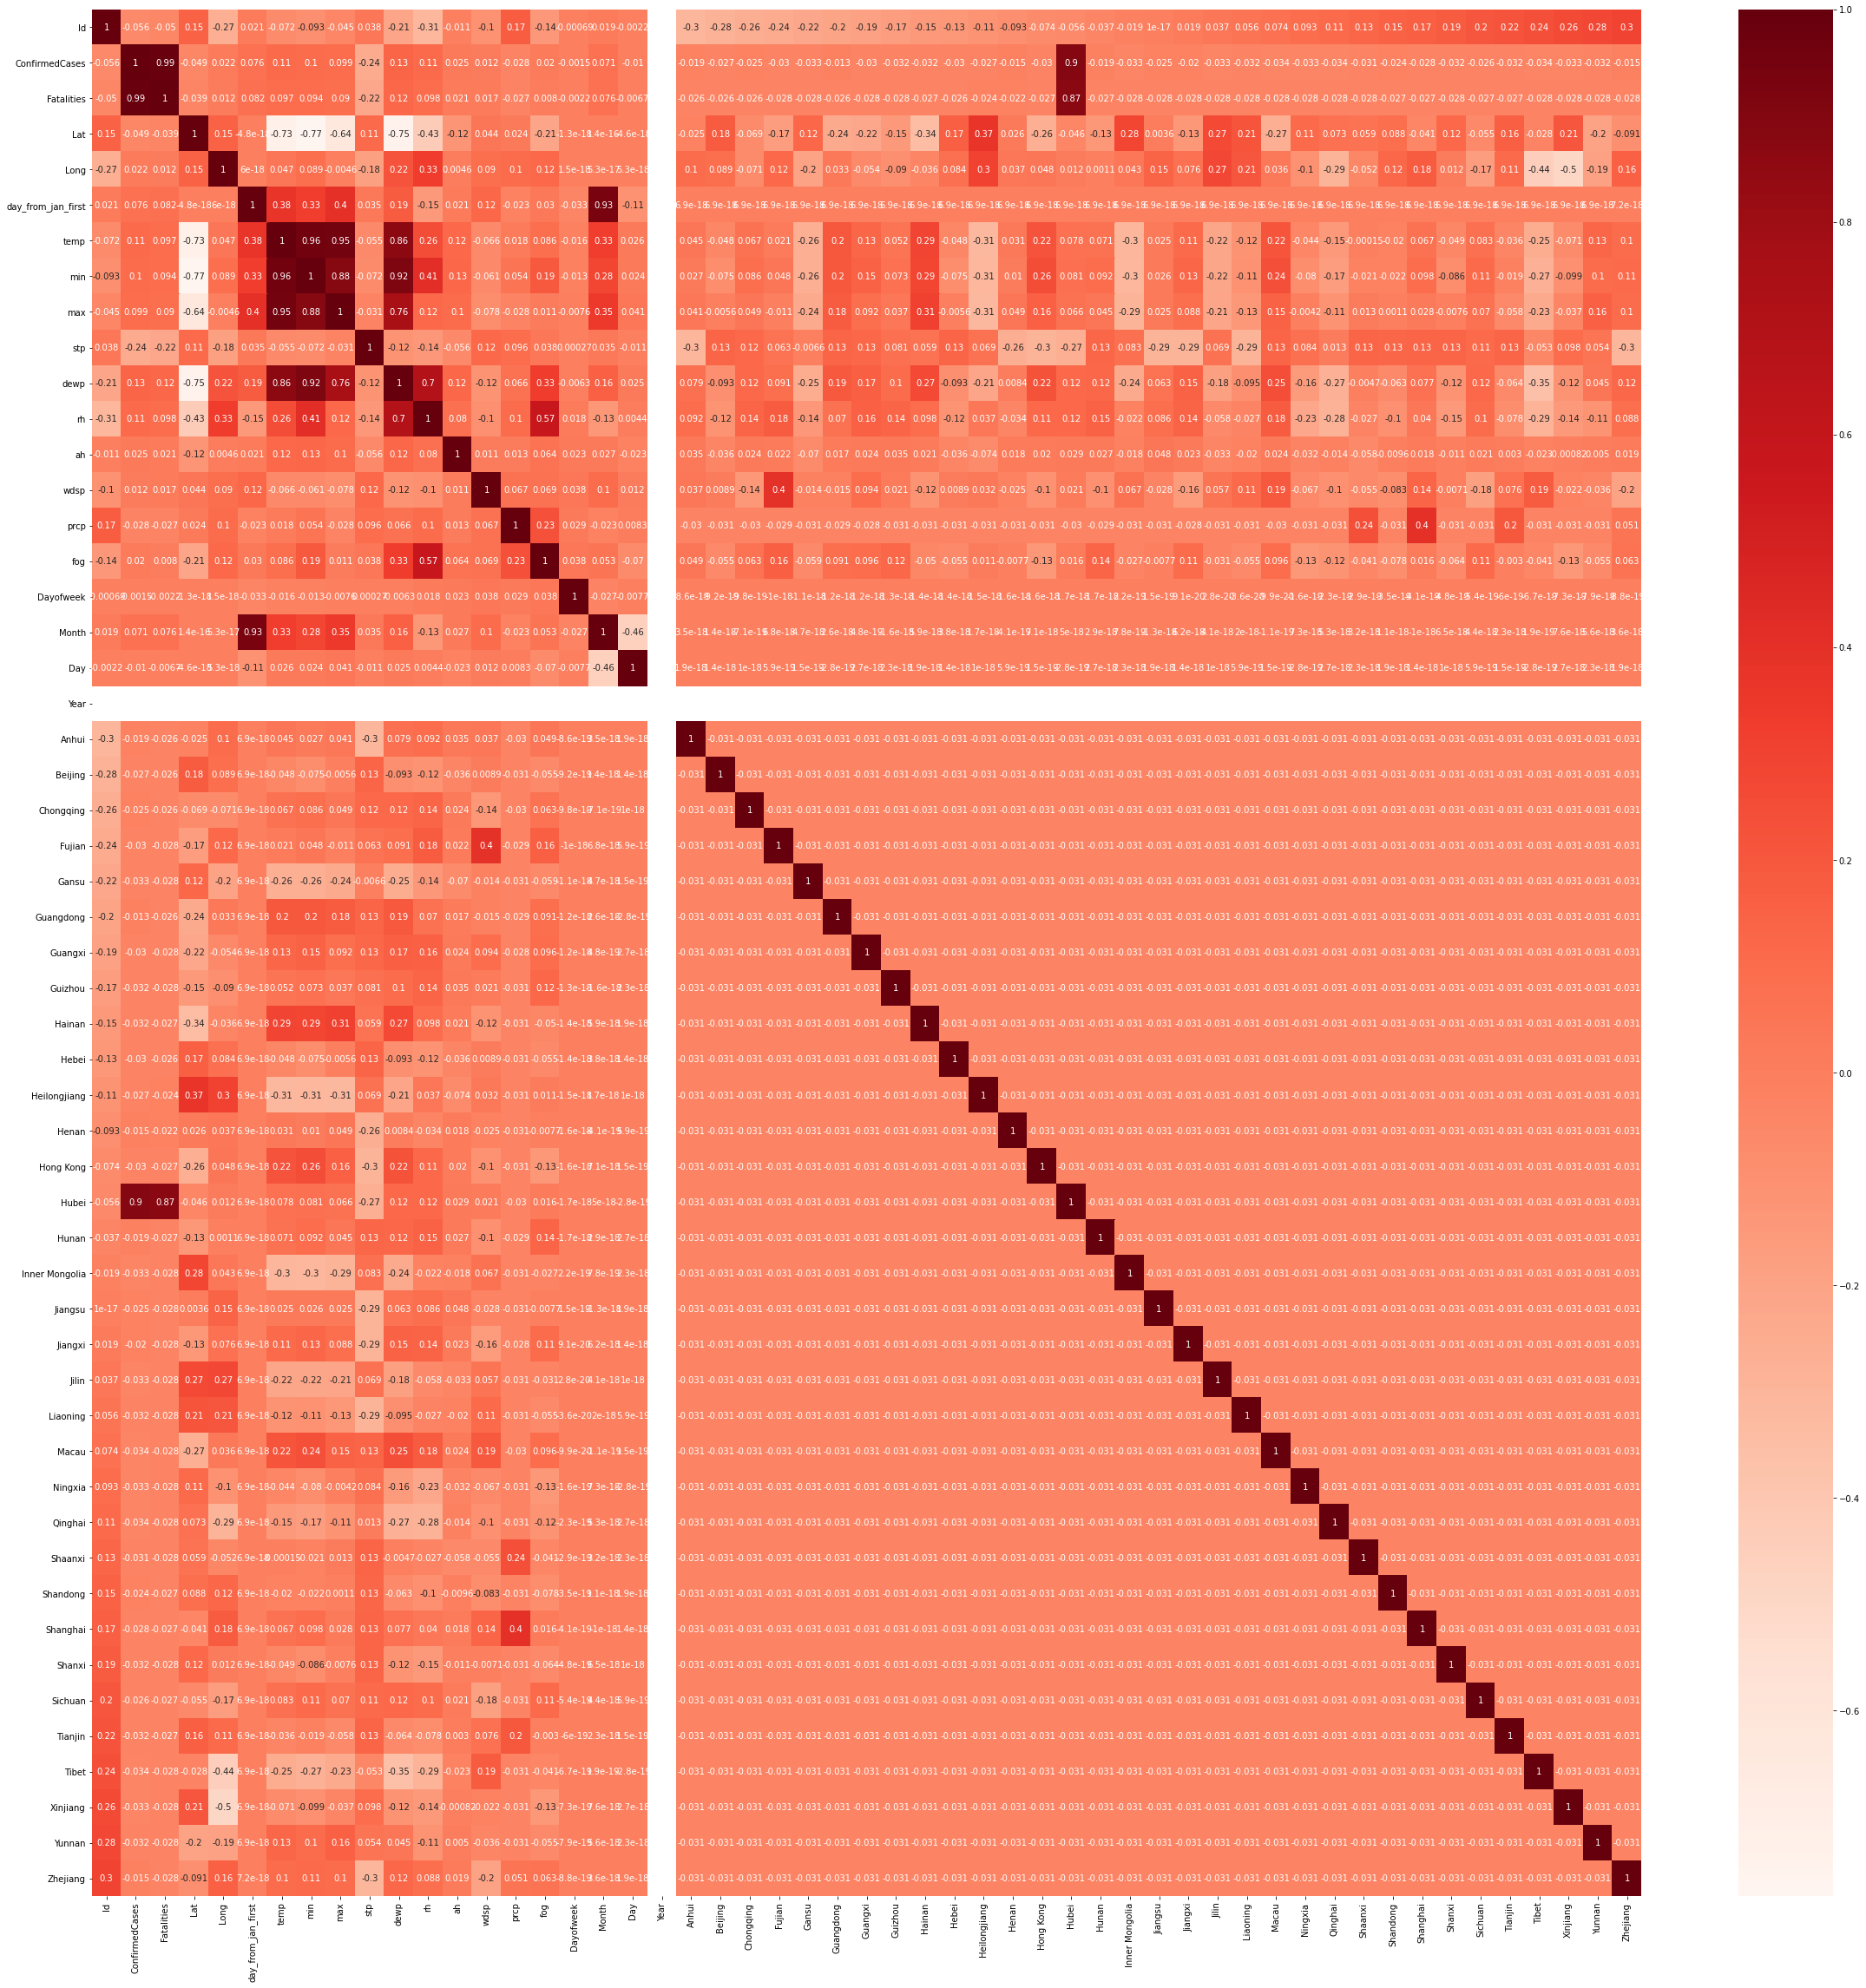

In [23]:
cor2 = df2.corr()
plt.figure(figsize=(40,40))
sns.heatmap(cor2, annot=True, cmap = plt.cm.Reds)

### Observations
1. From this HeatMap we can see that only stp is somewhat correlated(-0.24), other values all are low.
2. And the Province_State Hubei is highly Correlated with the Confirmed_Cases.

In [24]:
df2.drop(columns=['Country_Region','country+province','rh','ah','Year','Lat','Long','Id'], inplace=True)
scalar2 = MinMaxScaler()
tt_df2 = df2.iloc[:,:-1]
scale_df2 = pd.DataFrame(scalar2.fit_transform(tt_df2), columns=tt_df2.columns)
scale_df2.head()

,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,dewp,wdsp,prcp,fog,Dayofweek,Month,Day,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,Heilongjiang,Henan,Hong Kong,Hubei,Hunan,Inner Mongolia,Jiangsu,Jiangxi,Jilin,Liaoning,Macau,Ningxia,Qinghai,Shaanxi,Shandong,Shanghai,Shanxi,Sichuan,Tianjin,Tibet,Xinjiang,Yunnan
0,0.000015,0.0,0.000000,0.570991,0.592955,0.450648,0.015902,0.694527,0.131944,0.001100,1.0,0.333333,0.0,0.700000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000133,0.0,0.012987,0.598570,0.651663,0.497507,0.019002,0.703483,0.211806,0.000400,1.0,0.500000,0.0,0.733333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000221,0.0,0.025974,0.572012,0.649706,0.495513,0.023502,0.683582,0.270833,0.000400,1.0,0.666667,0.0,0.766667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000575,0.0,0.038961,0.546476,0.636008,0.461615,0.022202,0.643781,0.246528,0.001100,1.0,0.833333,0.0,0.800000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000885,0.0,0.051948,0.471910,0.588063,0.447657,0.019002,0.600000,0.163194,0.008301,1.0,1.000000,0.0,0.833333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
scale_df2.isnull().sum()

ConfirmedCases        0
Fatalities            0
day_from_jan_first    0
temp                  0
min                   0
max                   0
stp                   0
dewp                  0
wdsp                  0
prcp                  0
fog                   0
Dayofweek             0
Month                 0
Day                   0
Anhui                 0
Beijing               0
Chongqing             0
Fujian                0
Gansu                 0
Guangdong             0
Guangxi               0
Guizhou               0
Hainan                0
Hebei                 0
Heilongjiang          0
Henan                 0
Hong Kong             0
Hubei                 0
Hunan                 0
Inner Mongolia        0
Jiangsu               0
Jiangxi               0
Jilin                 0
Liaoning              0
Macau                 0
Ningxia               0
Qinghai               0
Shaanxi               0
Shandong              0
Shanghai              0
Shanxi                0
Sichuan         

In [26]:
y_scaled2 = scale_df2.loc[:,['ConfirmedCases','Fatalities']]
scale_df2.drop(columns=['ConfirmedCases','Fatalities'],inplace=True)

In [27]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(scale_df2,y_scaled2,test_size=0.2)

In [28]:
reg_country = LinearRegression()
reg_country = reg_country.fit(x_train2,y_train2)
y2 = reg_country.predict(x_test2)
print('Mean Squared Error: '+str(mean_squared_error(y_test2,y2)))
print('R2 Score: '+str(r2_score(y_test2, y2)))

Mean Squared Error: 0.0033651094713976195
R2 Score: 0.8272040053611263


### Results
Now our model has R2 score of 0.7(average) which is above average and now we can say that weather has an impact on COVID-19 spread in China and Hubei Province has a major part in it.